# The Role of Hedgers and Speculators in Liquidity Provision to Commodity Futures Markets 
## Python Implementation Exercise
### Rouwnehorst, Kang , Tang 2016

#### Motivation

Abstract  
This paper studies the dynamic interaction between the net positions of hedgers and speculators and risk premiums in commodity futures markets. Short-term position changes are mainly driven by the trading demands of impatient speculators, while longterm variation is primarily driven by the hedging demands from commercial hedgers. Variation in hedging pressure −the central variable in tests of the theory of normal backwardation− reflects both the liquidity demands of speculators and the demand for price insurance of hedgers. We provide empirical evidence that these two components influence expected futures returns with opposite signs


https://www.researchgate.net/publication/272242421_The_Role_of_Hedgers_and_Speculators_in_Liquidity_Provision_to_Commodity_Futures_Markets


##  Exercise

In this class we will try to build a simple quantitative strategy inspired in the paper  by RKT.  the objective of this exercise is put to test what you have learned using  pandas, numpy and visualization. 



### The trading strategy

For this exercise we will build a a simpler trading strategy based on the measurement $Q$ from primary users of a commodity. Lets remember that the CFTC publishes data on three types of market participants.

* Producer/Merchant/Processor/User Longs ("Hedgers /primary users")
* Swap Dealers
* Others

The measurement $Q$ is defined as follows:

$$
Q_{hedgers,t}=\frac{\text{netlong position}_{i,t}-\text{netlong position}_{i,t-1}}{OI_{i,t}}
$$

What $Q$ is telling us is the change in a side position from "Hedgers" with relation to the open interest. 

#### The trading signal

We will use $Q$ as our trading signal. Our quantitative strategy will be  go long 3 commodities with the higher $Q$ and will go short 3 commodities with the lower $Q$



## 1.  Data Analysis and Exploration




Load the required libraries

In [1]:
#load  basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data in to a data frame called `close_prices` The data is an csv file caled `commodities_continous.csv` . Set the dates as the index. 

In [2]:
close_prices=pd.read_csv("commodities_continuos.csv",index_col="Date")

In [3]:
#do we have missing data ? hint methond isna() if so  user your judgement to deal with them.  fillna()?

In [43]:
close_prices.isna().sum()
close_prices_clean=close_prices.fillna(method='ffill')
close_prices_clean=close_prices_clean.dropna()

In [5]:
# Do we have duplicated values hint index.duplicated() if so how many?

In [6]:
close_prices_clean.index.duplicated().sum()

1603

Drop duplicated data from if you found any

In [7]:
#lets clean the duplicated values
close_prices_clean=close_prices_clean.reset_index().drop_duplicates('Date').set_index('Date')

Visualize the historical prices of each commodity by plotting them in a separate chart.  Can you use subplots? 

In [8]:

# for counter,commod in enumerate(close_prices_clean.columns):
        

#     plt.plot(close_prices_clean[commod])
#     plt.title(commod)
#     plt.show()
#     print(commod)

## 2 Building the  Q Measurement




There are two avenues that you can choose here:

1.  You can  download the data directly from QUANDL  using the following tickers
```
CFTCDataTickers['CL']='CFTC/06765A_F_ALL'
CFTCDataTickers['RB']='CFTC/111659_F_ALL'
CFTCDataTickers['NG']='CFTC/023651_F_ALL'
CFTCDataTickers['HO']='CFTC/022651_FO_ALL'
CFTCDataTickers['C']='CFTC/002602_F_ALL'
CFTCDataTickers['W']='CFTC/001612_F_ALL'
CFTCDataTickers['S']='CFTC/005602_F_ALL'
CFTCDataTickers['GC']='CFTC/088691_F_ALL'
CFTCDataTickers['SI']='CFTC/084691_F_ALL'
CFTCDataTickers['HG']='CFTC/085692_F_ALL'    
```
2.  You can load the data directly from  `q_hedgers_df.csv`

Whatever rout you prefer at the end you should have a data frame called `q_hedgers_df`

In [9]:
import quandl

quandl.save_key("sRu4yJy7pyqqg5-b5nND")
#Loop through commodities to get the CFTC DATA
CFTCDataTickers={}
CFTCDataTickers['CL']='CFTC/06765A_F_ALL'
CFTCDataTickers['RB']='CFTC/111659_F_ALL'
CFTCDataTickers['NG']='CFTC/023651_F_ALL'
CFTCDataTickers['HO']='CFTC/022651_FO_ALL'
CFTCDataTickers['C']='CFTC/002602_F_ALL'
CFTCDataTickers['W']='CFTC/001612_F_ALL'
CFTCDataTickers['S']='CFTC/005602_F_ALL'
CFTCDataTickers['GC']='CFTC/088691_F_ALL'
CFTCDataTickers['SI']='CFTC/084691_F_ALL'
CFTCDataTickers['HG']='CFTC/085692_F_ALL'              
QHedgers={}
CFTCData={}
returns={}
StratIndex={}
for Commod in close_prices_clean.columns:      

    CFTCData[Commod]=quandl.get(CFTCDataTickers[Commod])
    #rename columns
    CFTCData[Commod]=CFTCData[Commod].rename(columns={'Producer/Merchant/Processor/User Longs':'HedgersLongs','Producer/Merchant/Processor/User Shorts':'HedgersShorts'})
    #get hedging Pressure
    CFTCData[Commod]['HedgingPressure']=(CFTCData[Commod]['HedgersShorts']-CFTCData[Commod]['HedgersLongs'])/CFTCData[Commod]['Open Interest']
    #Get Net Trading Measure
    CFTCData[Commod]['NetTradingHedgers']=-1*(CFTCData[Commod]['HedgersShorts']-CFTCData[Commod]['HedgersLongs'])
    CFTCData[Commod]['QHedgers']=(CFTCData[Commod]['NetTradingHedgers']-CFTCData[Commod]['NetTradingHedgers'].shift(1))/CFTCData[Commod]['Open Interest'].shift(1)
    QHedgers[Commod]= CFTCData[Commod]['QHedgers']
    #Get propensity to trade for each market participant
    CFTCData[Commod]['PTHedgers']=abs(CFTCData[Commod]['HedgersLongs']-CFTCData[Commod]['HedgersLongs'].shift(1))
    CFTCData[Commod]['PTHedgers']=CFTCData[Commod]['PTHedgers']+abs(CFTCData[Commod]['HedgersShorts']-CFTCData[Commod]['HedgersShorts'].shift(1))
    CFTCData[Commod]['PTHedgers']=CFTCData[Commod]['PTHedgers']/(CFTCData[Commod]['HedgersLongs'].shift(1)+CFTCData[Commod]['HedgersShorts'])

    CFTCData[Commod]['PTSwapDealers']=abs(CFTCData[Commod]['Swap Dealer Longs']-CFTCData[Commod]['Swap Dealer Longs'].shift(1))
    CFTCData[Commod]['PTSwapDealers']=CFTCData[Commod]['PTSwapDealers']+abs(CFTCData[Commod]['Swap Dealer Shorts']-CFTCData[Commod]['Swap Dealer Shorts'].shift(1))
    CFTCData[Commod]['PTSwapDealers']=CFTCData[Commod]['PTSwapDealers']/(CFTCData[Commod]['Swap Dealer Longs'].shift(1)+CFTCData[Commod]['Swap Dealer Shorts'])

    CFTCData[Commod]['PTMoneyManagers']=abs(CFTCData[Commod]['Money Manager Longs']-CFTCData[Commod]['Money Manager Longs'].shift(1))
    CFTCData[Commod]['PTMoneyManagers']=CFTCData[Commod]['PTMoneyManagers']+abs(CFTCData[Commod]['Money Manager Shorts']-CFTCData[Commod]['Money Manager Shorts'].shift(1))
    CFTCData[Commod]['PTMoneyManagers']=CFTCData[Commod]['PTMoneyManagers']/(CFTCData[Commod]['Money Manager Longs'].shift(1)+CFTCData[Commod]['Money Manager Shorts'])

    CFTCData[Commod]['PTOthers']=abs(CFTCData[Commod]['Other Reportable Longs']-CFTCData[Commod]['Other Reportable Longs'].shift(1))
    CFTCData[Commod]['PTOthers']=CFTCData[Commod]['PTOthers']+abs(CFTCData[Commod]['Other Reportable Shorts']-CFTCData[Commod]['Other Reportable Shorts'].shift(1))
    CFTCData[Commod]['PTOthers']=CFTCData[Commod]['PTOthers']/(CFTCData[Commod]['Other Reportable Longs'].shift(1)+CFTCData[Commod]['Other Reportable Shorts'])
 

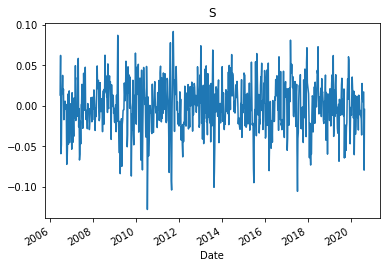

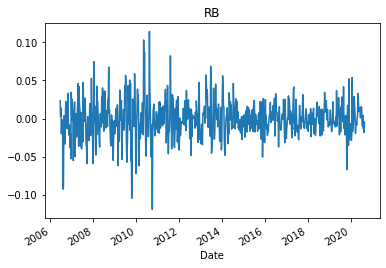

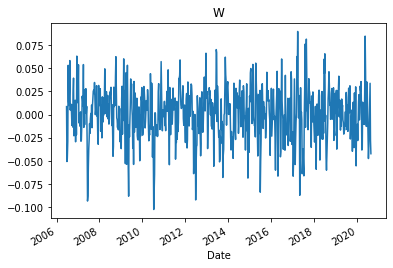

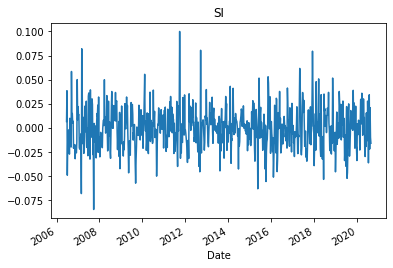

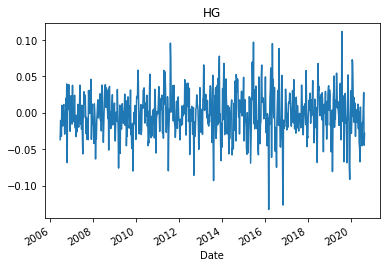

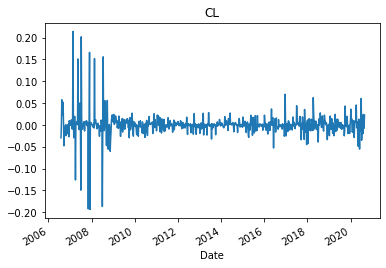

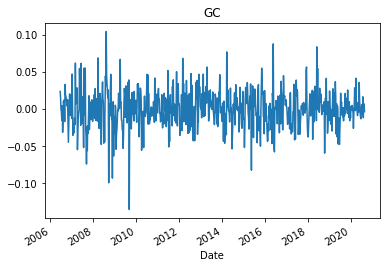

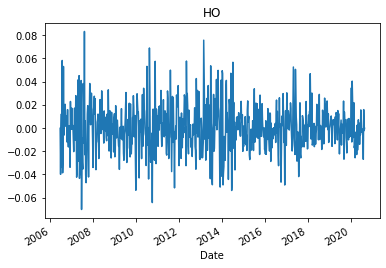

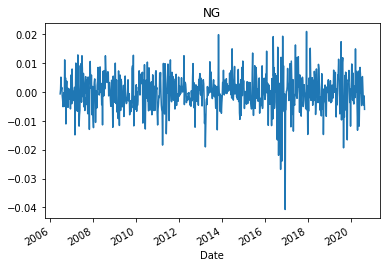

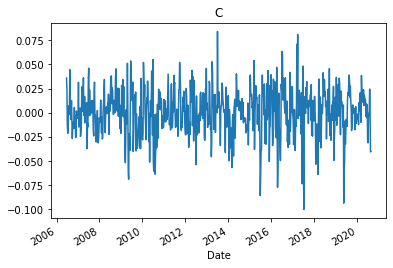

In [10]:

q_hedgers_df=pd.DataFrame.from_dict(QHedgers)
for q in q_hedgers_df.columns:
    
    q_hedgers_df[q].plot()
    plt.title(q)
    plt.show()
q_hedgers_df=q_hedgers_df.drop_duplicates()
q_hedgers_df.to_csv("q_hedgers_df.csv")

Now calculate the absolute average of each of the commodities $Q$ measures and compare that the magnitudes are in line with what you observed on the paper.  You need to produce a chart similar to this one

<img src="static/img/ExcelCFTC.png">

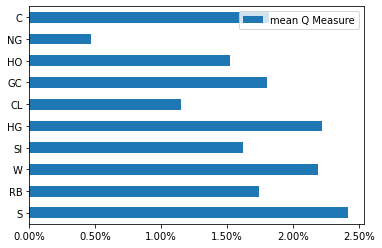

In [11]:
import matplotlib.ticker as mtick
mean_qs=pd.DataFrame(abs(q_hedgers_df).mean())
mean_qs.columns=["mean Q Measure"]
ax=mean_qs.plot.barh()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))


## 3 Building the Trading Signal 

Lets stop for a bit and talk about the data published by the CFTC. 
<img src="static/img/QMeasureTimeLine.png">

As you can see the data published by the CFTC does not match in time when it is collected, published and available to market participants. 

On your Q Measurement data when does the data is recorded according to the diagrame above? you can used the weekday() method of a date time

In [12]:
data_days=np.array([i.dayofweek for i in CFTCData[Commod].index])
np.unique(data_days,return_counts=True)
#monday 0, so CFTC measures backdated the  data

(array([0, 1, 2]), array([ 10, 731,   1], dtype=int64))

#### 1 week return as a target 

So now we know that the trading signal is published backdated to when it was collected. Also we can see that market will digest the information over the next week. 

We need to reshape our data before we can build the trading strategy.


Create a function called 
```
def week_range(target_date):
    return monday.date(), dayafter.date()

```

that returns the next monday  date and the day after , import the library datetime and use datetime.timedelta

In [13]:
def week_range(target_date):
   
    
    tmp_date=(target_date+datetime.timedelta(days=7))
    monday_offset=tmp_date.dayofweek-0
   
    
    monday=tmp_date-datetime.timedelta(days=monday_offset)
    tuesday=monday+datetime.timedelta(days=1)
    return monday.date(), tuesday.date()


Create a column in `q_hedgers_csv`  called `next_monday` and one called `next_tuesday` and assign the correct dates

In [14]:
import datetime
next_limits=np.array([week_range(i) for i in q_hedgers_df.index])
q_hedgers_df["next_monday"]=next_limits[:,0]
q_hedgers_df["next_tuesday"]=next_limits[:,1]
q_hedgers_df

,S,RB,W,SI,HG,CL,GC,HO,NG,C,next_monday,next_tuesday
Date,,,,,,,,,,,,
2006-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-06-19,2006-06-20
2006-06-20,0.013065,0.023221,0.008606,0.006602,-0.036970,NaN,0.023434,-0.000293,-0.000640,0.035821,2006-06-26,2006-06-27
2006-06-27,0.061966,0.002614,-0.050610,0.038485,-0.010614,NaN,0.014840,-0.039981,0.000943,0.023644,2006-07-03,2006-07-04
2006-07-03,-0.059263,0.013704,-0.047188,-0.049228,-0.014347,NaN,0.000342,-0.003197,0.005175,-0.012703,2006-07-10,2006-07-11
2006-07-11,-0.048175,-0.019923,-0.028788,-0.013323,-0.032190,NaN,-0.004185,0.012097,0.000920,-0.021310,2006-07-17,2006-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-28,0.004910,0.004071,-0.013079,0.034267,-0.014321,-0.020184,0.016220,-0.004134,0.001494,0.001530,2020-08-03,2020-08-04
2020-08-04,0.016832,-0.013152,0.010962,-0.022085,0.007315,0.024081,-0.011885,-0.027037,-0.003194,0.024362,2020-08-10,2020-08-11
2020-08-11,0.016781,-0.005556,0.033737,0.020859,0.027790,-0.007725,0.007018,0.015861,-0.004502,0.000717,2020-08-17,2020-08-18


Verify that your dates are correct

    


In [16]:
print(q_hedgers_df["next_monday"].apply(lambda x: x.weekday()).unique())
print(q_hedgers_df["next_tuesday"].apply(lambda x: x.weekday()).unique())

[0]
[1]


Now we need to calculate the return from next_monday to next_tuesday. Try mergin `q_hedgers_df` with close prices on one of the column indices what happens?

In [17]:
q_hedgers_df.merge(close_prices_clean,left_on="next_monday",right_index=True,how="inner")

,S_x,RB_x,W_x,SI_x,HG_x,CL_x,GC_x,HO_x,NG_x,C_x,...,S_y,RB_y,W_y,SI_y,HG_y,CL_y,GC_y,HO_y,NG_y,C_y
Date,,,,,,,,,,,,,,,,,,,,,


In [18]:
close_prices_clean.index

Index(['2005-10-03', '2005-10-04', '2005-10-05', '2005-10-06', '2005-10-07',
       '2005-10-10', '2005-10-11', '2005-10-12', '2005-10-13', '2005-10-14',
       ...
       '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08', '2017-11-09',
       '2017-11-10', '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16'],
      dtype='object', name='Date', length=3065)

You need to be careful with your data types. As python does not require to declare them in advance you need to verify that the data is on the type as you expected 

In [19]:
close_prices_clean.index=pd.to_datetime(close_prices_clean.index)

In [24]:
q_hedgers_df.merge(close_prices_clean,left_on="next_monday",right_index=True,how="left")

,S_x,RB_x,W_x,SI_x,HG_x,CL_x,GC_x,HO_x,NG_x,C_x,...,S_y,RB_y,W_y,SI_y,HG_y,CL_y,GC_y,HO_y,NG_y,C_y
Date,,,,,,,,,,,,,,,,,,,,,
2006-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,584.5,2.1637,395.25,9.970,2.9910,68.98,568.8,1.8948,6.893,229.75
2006-06-20,0.013065,0.023221,0.008606,0.006602,-0.036970,NaN,0.023434,-0.000293,-0.000640,0.035821,...,569.5,2.3433,403.00,10.240,3.1280,71.80,584.8,1.9789,5.969,223.00
2006-06-27,0.061966,0.002614,-0.050610,0.038485,-0.010614,NaN,0.014840,-0.039981,0.000943,0.023644,...,601.5,2.3846,421.00,10.833,3.2615,73.93,616.0,2.0286,6.104,243.25
2006-07-03,-0.059263,0.013704,-0.047188,-0.049228,-0.014347,NaN,0.000342,-0.003197,0.005175,-0.012703,...,603.0,2.3049,422.50,11.030,3.4865,73.61,626.1,1.9645,5.608,247.75
2006-07-11,-0.048175,-0.019923,-0.028788,-0.013323,-0.032190,NaN,-0.004185,0.012097,0.000920,-0.021310,...,590.0,2.3990,412.50,11.010,3.5085,75.30,651.9,2.0194,5.783,251.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-28,0.004910,0.004071,-0.013079,0.034267,-0.014321,-0.020184,0.016220,-0.004134,0.001494,0.001530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,0.016832,-0.013152,0.010962,-0.022085,0.007315,0.024081,-0.011885,-0.027037,-0.003194,0.024362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-11,0.016781,-0.005556,0.033737,0.020859,0.027790,-0.007725,0.007018,0.015861,-0.004502,0.000717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
q_hedgers_df.next_monday=pd.to_datetime(q_hedgers_df.next_monday)
q_hedgers_df.next_tuesday=pd.to_datetime(q_hedgers_df.next_tuesday)

Now create a data frame called `returns` that containes monday to tuesday returns and is aligned on the index with the same dates of the `q_measures_df`

In [25]:
close_prices_clean[close_prices_clean.index.isin(q_hedgers_df.next_monday)]

,S,RB,W,SI,HG,CL,GC,HO,NG,C
Date,,,,,,,,,,
2006-06-19,584.5,2.1637,395.25,9.970,2.9910,68.98,568.8,1.8948,6.893,229.75
2006-06-26,569.5,2.3433,403.00,10.240,3.1280,71.80,584.8,1.9789,5.969,223.00
2006-07-03,601.5,2.3846,421.00,10.833,3.2615,73.93,616.0,2.0286,6.104,243.25
2006-07-10,603.0,2.3049,422.50,11.030,3.4865,73.61,626.1,1.9645,5.608,247.75
2006-07-17,590.0,2.3990,412.50,11.010,3.5085,75.30,651.9,2.0194,5.783,251.75
...,...,...,...,...,...,...,...,...,...,...
2017-10-16,1042.5,1.6169,436.50,17.369,3.2390,51.87,1299.9,1.8129,2.946,350.50
2017-10-23,1042.5,1.6783,436.75,17.075,3.1880,51.90,1277.7,1.7878,2.991,351.25
2017-10-30,1042.5,1.7641,424.75,16.847,3.1120,54.15,1277.7,1.8777,2.966,348.75


In [27]:
close_prices_clean[close_prices_clean.index.isin(q_hedgers_df.next_tuesday)]

,S,RB,W,SI,HG,CL,GC,HO,NG,C
Date,,,,,,,,,,
2006-06-20,585.25,2.1668,403.75,10.270,2.9905,68.94,576.9,1.9074,6.502,229.75
2006-06-27,578.00,2.3289,414.25,10.195,2.9910,71.92,581.6,1.9587,6.107,225.25
2006-07-11,607.00,2.3122,435.50,11.470,3.5390,74.16,643.1,2.0106,5.633,253.75
2006-07-18,589.00,2.3669,417.25,10.455,3.4840,73.54,629.5,1.9834,5.555,246.50
2006-07-25,585.25,2.3900,413.50,10.895,3.3875,73.75,618.0,1.9439,6.409,239.50
...,...,...,...,...,...,...,...,...,...,...
2017-10-17,1042.50,1.6301,434.75,17.041,3.1955,51.88,1283.0,1.8098,2.962,350.00
2017-10-24,1042.50,1.7155,438.00,16.966,3.1980,52.47,1275.0,1.8221,2.974,352.75
2017-10-31,1042.50,1.7796,418.50,16.693,3.1010,54.38,1270.5,1.8845,2.896,345.75


In [28]:
close_prices_clean_rs=close_prices_clean.resample("1d").last()

In [30]:
close_prices_clean_rs[close_prices_clean_rs.index.isin(q_hedgers_df.next_tuesday)]

,S,RB,W,SI,HG,CL,GC,HO,NG,C
Date,,,,,,,,,,
2006-06-20,585.25,2.1668,403.75,10.270,2.9905,68.94,576.9,1.9074,6.502,229.75
2006-06-27,578.00,2.3289,414.25,10.195,2.9910,71.92,581.6,1.9587,6.107,225.25
2006-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-11,607.00,2.3122,435.50,11.470,3.5390,74.16,643.1,2.0106,5.633,253.75
2006-07-18,589.00,2.3669,417.25,10.455,3.4840,73.54,629.5,1.9834,5.555,246.50
...,...,...,...,...,...,...,...,...,...,...
2017-10-17,1042.50,1.6301,434.75,17.041,3.1955,51.88,1283.0,1.8098,2.962,350.00
2017-10-24,1042.50,1.7155,438.00,16.966,3.1980,52.47,1275.0,1.8221,2.974,352.75
2017-10-31,1042.50,1.7796,418.50,16.693,3.1010,54.38,1270.5,1.8845,2.896,345.75


In [31]:
close_prices_clean_rs[close_prices_clean_rs.index.isin(q_hedgers_df.next_monday)]

,S,RB,W,SI,HG,CL,GC,HO,NG,C
Date,,,,,,,,,,
2006-06-19,584.5,2.1637,395.25,9.970,2.9910,68.98,568.8,1.8948,6.893,229.75
2006-06-26,569.5,2.3433,403.00,10.240,3.1280,71.80,584.8,1.9789,5.969,223.00
2006-07-03,601.5,2.3846,421.00,10.833,3.2615,73.93,616.0,2.0286,6.104,243.25
2006-07-10,603.0,2.3049,422.50,11.030,3.4865,73.61,626.1,1.9645,5.608,247.75
2006-07-17,590.0,2.3990,412.50,11.010,3.5085,75.30,651.9,2.0194,5.783,251.75
...,...,...,...,...,...,...,...,...,...,...
2017-10-16,1042.5,1.6169,436.50,17.369,3.2390,51.87,1299.9,1.8129,2.946,350.50
2017-10-23,1042.5,1.6783,436.75,17.075,3.1880,51.90,1277.7,1.7878,2.991,351.25
2017-10-30,1042.5,1.7641,424.75,16.847,3.1120,54.15,1277.7,1.8777,2.966,348.75


Look at the numbers of rows if they do not match. then you need to use a brute force solution and loop through the entire data frame

In [32]:
weekly_returns=[]
days=[]
close_prices_clean=close_prices_clean.drop_duplicates().copy()
for day in range(q_hedgers_df.shape[0]):
    tmp_data=close_prices_clean.loc[q_hedgers_df.iloc[day].next_monday:q_hedgers_df.iloc[day].next_tuesday]
    try:
        week_return=tmp_data.iloc[-1]/tmp_data.iloc[0]
        weekly_returns.append(week_return)
        days.append(q_hedgers_df.index[day])
    except:
        print(day)
weekly_returns=pd.DataFrame(weekly_returns)
weekly_returns.index=days

596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741


In [33]:

weekly_returns

,S,RB,W,SI,HG,CL,GC,HO,NG,C
2006-06-13,1.001283,1.001433,1.021505,1.030090,0.999833,0.999420,1.014241,1.006650,0.943276,1.000000
2006-06-20,1.014925,0.993855,1.027916,0.995605,0.956202,1.001671,0.994528,0.989792,1.023119,1.010090
2006-06-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2006-07-03,1.006633,1.003167,1.030769,1.039891,1.015058,1.007472,1.027152,1.023467,1.004458,1.024218
2006-07-11,0.998305,0.986619,1.011515,0.949591,0.993017,0.976627,0.965639,0.982173,0.960574,0.979146
...,...,...,...,...,...,...,...,...,...,...
2017-10-10,1.000000,1.008164,0.995991,0.981116,0.986570,1.000193,0.986999,0.998290,1.005431,0.998573
2017-10-17,1.000000,1.022165,1.002862,0.993616,1.003137,1.010983,0.997887,1.019186,0.994316,1.004270
2017-10-24,1.000000,1.008786,0.985285,0.990859,0.996465,1.004247,0.994365,1.003621,0.976399,0.991398
2017-10-31,1.000000,0.991967,0.991875,0.982884,0.978306,0.997384,0.995474,0.989548,1.005743,0.999282


Now use the re_index() method to  get the right shape of the Data frames
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html

In [34]:

#lets reindex at both times
weekly_returns=weekly_returns.reindex(q_hedgers_df.index).copy()
weekly_returns=weekly_returns.dropna()
q_hedgers_df=q_hedgers_df.reindex(weekly_returns.index)

Verify the data match 

In [35]:
weekly_returns

,S,RB,W,SI,HG,CL,GC,HO,NG,C
Date,,,,,,,,,,
2006-06-13,1.001283,1.001433,1.021505,1.030090,0.999833,0.999420,1.014241,1.006650,0.943276,1.000000
2006-06-20,1.014925,0.993855,1.027916,0.995605,0.956202,1.001671,0.994528,0.989792,1.023119,1.010090
2006-06-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2006-07-03,1.006633,1.003167,1.030769,1.039891,1.015058,1.007472,1.027152,1.023467,1.004458,1.024218
2006-07-11,0.998305,0.986619,1.011515,0.949591,0.993017,0.976627,0.965639,0.982173,0.960574,0.979146
...,...,...,...,...,...,...,...,...,...,...
2017-10-10,1.000000,1.008164,0.995991,0.981116,0.986570,1.000193,0.986999,0.998290,1.005431,0.998573
2017-10-17,1.000000,1.022165,1.002862,0.993616,1.003137,1.010983,0.997887,1.019186,0.994316,1.004270
2017-10-24,1.000000,1.008786,0.985285,0.990859,0.996465,1.004247,0.994365,1.003621,0.976399,0.991398


In [36]:
q_hedgers_df


,S,RB,W,SI,HG,CL,GC,HO,NG,C,next_monday,next_tuesday
Date,,,,,,,,,,,,
2006-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-06-19,2006-06-20
2006-06-20,0.013065,0.023221,0.008606,0.006602,-0.036970,NaN,0.023434,-0.000293,-0.000640,0.035821,2006-06-26,2006-06-27
2006-06-27,0.061966,0.002614,-0.050610,0.038485,-0.010614,NaN,0.014840,-0.039981,0.000943,0.023644,2006-07-03,2006-07-04
2006-07-03,-0.059263,0.013704,-0.047188,-0.049228,-0.014347,NaN,0.000342,-0.003197,0.005175,-0.012703,2006-07-10,2006-07-11
2006-07-11,-0.048175,-0.019923,-0.028788,-0.013323,-0.032190,NaN,-0.004185,0.012097,0.000920,-0.021310,2006-07-17,2006-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-10,-0.012816,0.031344,0.026451,-0.003880,-0.021349,0.018316,0.006067,0.008683,0.003988,0.011979,2017-10-16,2017-10-17
2017-10-17,-0.045425,0.005975,0.023985,-0.016477,-0.030296,0.001199,-0.008604,0.005537,-0.005023,0.006638,2017-10-23,2017-10-24
2017-10-24,0.031765,-0.010517,0.012402,-0.013588,-0.004491,-0.000322,0.008629,-0.000855,-0.002912,0.006755,2017-10-30,2017-10-31


**Now you can build the trading rule**
Hint : clean yor Q data frame to only include the measurements and the name of each column to be the same as in returns.

In [37]:
just_qs=q_hedgers_df[[col for col in q_hedgers_df if "next" not in col ]]
top=pd.DataFrame(np.sort(just_qs.values)[:,-3:])
low=pd.DataFrame(np.sort(just_qs.values)[:,:3])
top.index=just_qs.index
low.index=just_qs.index

In [38]:
#why T? where (x,else 1)
signals=just_qs.T.where((just_qs.T<top[0].T) ,1).T
signals=signals.T.where((signals.T>low[2].T) ,-1).T
signals=signals.T.where((signals.T == 1) | (signals.T ==-1) ,0).T

In [39]:
#Observe teh percentage of each commodity in the top 3 in the trading signal
signals.where(signals>0).count()/len(signals.index)

S     0.365772
RB    0.258389
W     0.377517
SI    0.266779
HG    0.322148
CL    0.273490
GC    0.323826
HO    0.276846
NG    0.203020
C     0.327181
dtype: float64

In [40]:

#times int he bottom 3
signals.where(signals<0).count()/len(signals.index)

S     0.347315
RB    0.333893
W     0.330537
SI    0.293624
HG    0.338926
CL    0.248322
GC    0.315436
HO    0.300336
NG    0.203020
C     0.300336
dtype: float64

<AxesSubplot:xlabel='Date'>

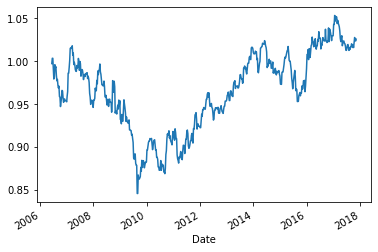

In [42]:
(1+(1*signals*(weekly_returns-1)).sum(axis=1)/6).cumprod().plot()